In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Exploratory Data Analysis

In [3]:
CORPUS_FILEPATH = "dataset/corpus.csv"
QUERIES_FILEPATH = "dataset/queries.csv"

## Corpus dataset

In [4]:
#Read dataset
corpus = pd.read_csv(CORPUS_FILEPATH)

In [5]:
print(corpus.shape)
corpus.head()

(609, 8)


,title,author,source,published_at,category,url,body,uuid
0,200+ of the best deals from Amazon's Cyber Mon...,NaN,Mashable,2023-11-27T08:45:59+00:00,entertainment,https://mashable.com/article/cyber-monday-deal...,"Table of Contents Table of Contents Echo, Fire...",162d0b25487d4fabb788d10c3112312a
1,ASX set to drop as Wall Street’s September slu...,Stan Choe,The Sydney Morning Herald,2023-09-26T19:11:30+00:00,business,https://www.smh.com.au/business/markets/asx-se...,"ETF provider Betashares, which manages $30 bil...",9baae8f1b1b54a77b72f18fb47a46688
2,Amazon sellers sound off on the FTC's 'long-ov...,NaN,Cnbc | World Business News Leader,2023-10-06T21:31:00+00:00,business,https://www.cnbc.com/2023/10/06/amazon-sellers...,A worker sorts out parcels in the outbound doc...,ed80d097383b431a96618a0b62b154d6
3,"Christmas Day preview: 49ers, Ravens square of...","Colum Dell, Yardbarker",Yardbarker,2023-12-24T23:34:39+00:00,sports,https://www.yardbarker.com/nfl/articles/christ...,"Christmas Day isn't just for the NBA, as the N...",a1a4cd07573247f891de321560f97d09
4,"Raiders vs. Lions live score, updates, highlig...",Dan Treacy,Sporting News,2023-10-30T22:20:03+00:00,sports,https://www.sportingnews.com/us/nfl/news/raide...,The Lions just needed to get themselves back i...,046d5f4e21f34edda2bd4613e13afc38


In [6]:
corpus['source'].nunique()

49

In [7]:
#compute number of tokens for each body text
corpus['num_tokens'] = corpus['body'].str.split().str.len()
corpus['num_tokens'].describe()

count      609.000000
mean      1746.008210
std       1338.843744
min        839.000000
25%       1036.000000
50%       1298.000000
75%       1938.000000
max      12387.000000
Name: num_tokens, dtype: float64

In [8]:
corpus['published_at'].min(), corpus['published_at'].max()

('2023-09-26T05:26:05+00:00', '2023-12-25T23:36:00+00:00')

In [9]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         609 non-null    object
 1   author        541 non-null    object
 2   source        609 non-null    object
 3   published_at  609 non-null    object
 4   category      609 non-null    object
 5   url           609 non-null    object
 6   body          609 non-null    object
 7   uuid          609 non-null    object
 8   num_tokens    609 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 42.9+ KB


In [10]:
#compute the average number of articles per author
corpus.groupby(['author'])['title'].count().mean()

1.8093645484949832

<Axes: xlabel='category'>

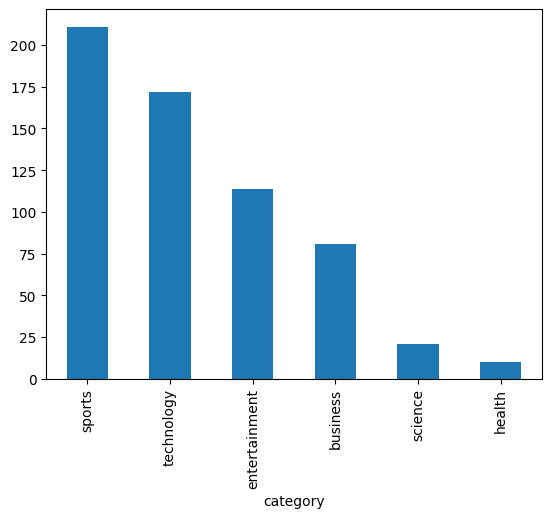

In [11]:
corpus['category'].value_counts().plot(kind='bar')

In [12]:
corpus['source'].value_counts(normalize=True)[:10]

source
Sporting News                       0.165846
TechCrunch                          0.159278
The Verge                           0.073892
Polygon                             0.072250
The Guardian                        0.047619
The Independent - Life and Style    0.044335
Fortune                             0.041051
Engadget                            0.031199
The Age                             0.027915
The Roar | Sports Writers Blog      0.027915
Name: proportion, dtype: float64

In [13]:
corpus[corpus['author'].isnull()]['source'].value_counts(normalize=True)

source
FOX News - Lifestyle                                           0.205882
FOX News - Health                                              0.147059
Cnbc | World Business News Leader                              0.102941
Live Science: The Most Interesting Articles                    0.102941
Business Line                                                  0.088235
FOX News - Entertainment                                       0.073529
Seeking Alpha                                                  0.044118
Mashable                                                       0.029412
Yahoo News                                                     0.029412
Sky Sports                                                     0.029412
BBC News - Entertainment & Arts                                0.029412
The Sydney Morning Herald                                      0.014706
Business Today | Latest Stock Market And Economy News India    0.014706
BBC News - Technology                                    

**Insights**:
- The corpus dataset contains 609 articles published in 49 websites in Q4 2023
- On average, articles' body contains 1746 tokens
- The author is missing only in 68 articles (11% of cases)
- 41% of articles with missing author have been published in "Fox News"
- On average, one author publish 1.8 articles
- "Sports" is the most frequent category
- "Sporting News" is the most frequent website

In [14]:
#concatenate text from body and title
body_text = " ".join(review for review in corpus['body'])
title_text = " ".join(review for review in corpus['title'])
body_title_text = body_text + title_text

In [15]:
def generate_word_cloud(text:str)->None:
    # Generate word cloud
    word_cloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=set(STOPWORDS),
        min_font_size=10
    ).generate(text)

    # Display the generated Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.show()

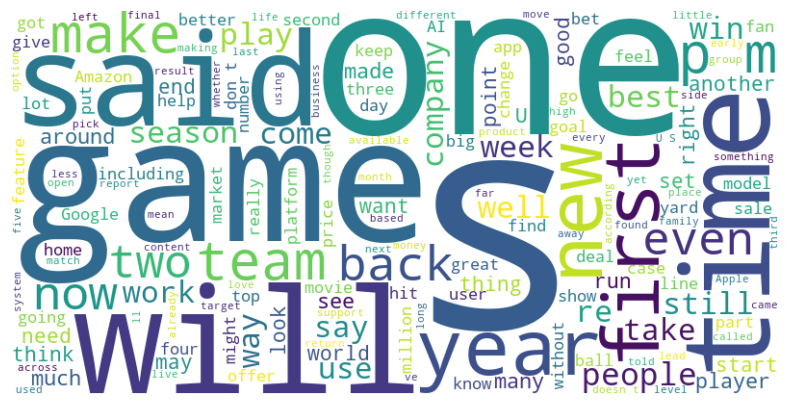

In [16]:
generate_word_cloud(body_title_text)

The Word Cloud shows the most frequent keywords. "Game", "Team", "Season", "Player" words seem to relate to the Sports category.

## Query dataset

In [17]:
#Read dataset
queries = pd.read_csv(QUERIES_FILEPATH)

In [18]:
print(queries.shape)
queries.head()

(2330, 2)


,query,result
0,Between the Sky Sports report on Manchester Un...,"['414e032731794e7ca2b7ad46eb11df41', '61bd8181..."
1,Considering the information from an article by...,[]
2,Does the Sporting News article attribute the r...,"['b563f26ea6714e02a9cd178fa7b2479d', 'e6a68318..."
3,Between the report from CBSSports.com publishe...,"['12949c3389e642b0acb55c4e6641f092', 'b8d042ab..."
4,Do the articles from Sporting News on 'Line Sh...,"['0deb1f49aee6427bad32e9f0fb3aa77e', 'f2c1b7a0..."


In [19]:
#Example of Query - Article match
print(queries['query'][0])
print(queries['result'][0])
corpus[corpus['uuid']=='414e032731794e7ca2b7ad46eb11df41']

Between the Sky Sports report on Manchester United's performance published on October 28, 2023, and the Sporting News report on Manchester United's status in European competitions published on December 12, 2023, has the narrative regarding Manchester United's success in European competitions changed?
['414e032731794e7ca2b7ad46eb11df41', '61bd8181d19646e89338d0836f2cfdfb']


,title,author,source,published_at,category,url,body,uuid,num_tokens
571,Ten Hag responds to Carra: Man Utd have actual...,NaN,Sky Sports,2023-10-28T21:30:00+00:00,sports,https://www.skysports.com/football/news/11095/...,Erik ten Hag has disagreed with Jamie Carraghe...,414e032731794e7ca2b7ad46eb11df41,911


In [20]:
#compute the lenght of result set for each query
queries['result_len'] = queries.result.apply(len)
#compute the distribution of result_len
queries['result_len'].describe()

count    2330.000000
mean       75.283262
std        46.377468
min         2.000000
25%        72.000000
50%        72.000000
75%       108.000000
max       144.000000
Name: result_len, dtype: float64

In [21]:
#compute number of tokens for each body text
queries['num_tokens'] = queries['query'].str.split().str.len()
queries['num_tokens'].describe()

count    2330.000000
mean       46.060944
std        10.158413
min        18.000000
25%        39.000000
50%        45.000000
75%        53.000000
max        94.000000
Name: num_tokens, dtype: float64

**Insights**:
- 2330 queries in total
- On average, each query match with 75 articles
- On average, each query contains 46 tokens